*Diabetes Prediction Case Study*

*Problem Statement*

*Background:*

  Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage.
Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. Even though it's incurable, it can be managed by treatment and medication.

Researchers at the Bio-Solutions lab want to get a better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes.

You as a data scientist at Bio-Solutions have to build a classification model using a dataset collected by the "National Institute of Diabetes and Digestive and Kidney Diseases" consisting of several attributes that would help to identify whether a person is at risk of diabetes or not.

*Objective:*
To build a model to predict whether an individual is at risk of diabetes or not.



*Data Description:*
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
 SkinThickness: Triceps skinfold thickness (mm)
- Insulin: 2-Hour serum insumlin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
- Age: Age in years
- Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

In [2]:
# library for data manipulation
import pandas as pd
import numpy as np


# library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for model building
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix

# libraries for model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# libraries for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('pima-diabetes.csv')

In [4]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
534,1,77,56,30,56,33.3,1.251,24,0
671,1,99,58,10,0,25.4,0.551,21,0
131,9,122,56,0,0,33.3,1.114,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- All data are numeric in nature
- There is no empty cell

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='SkinThickness', ylabel='Count'>

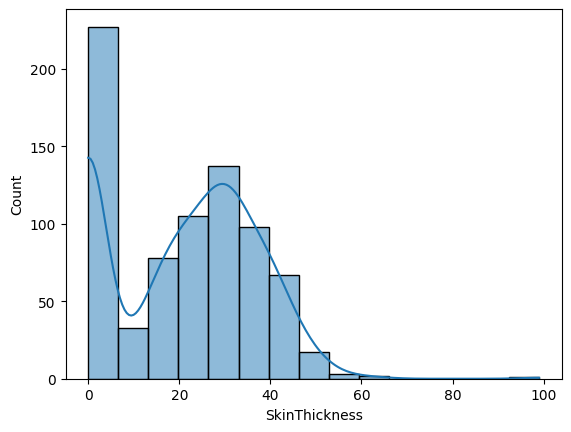

In [8]:
sns.histplot(data = df, x = 'SkinThickness', kde = True)

<Axes: xlabel='Insulin', ylabel='Count'>

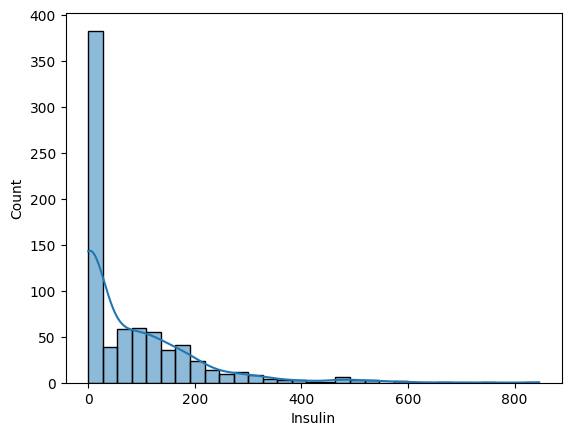

In [9]:
sns.histplot(data = df, x = 'Insulin', kde = True)

<Axes: xlabel='BMI', ylabel='Count'>

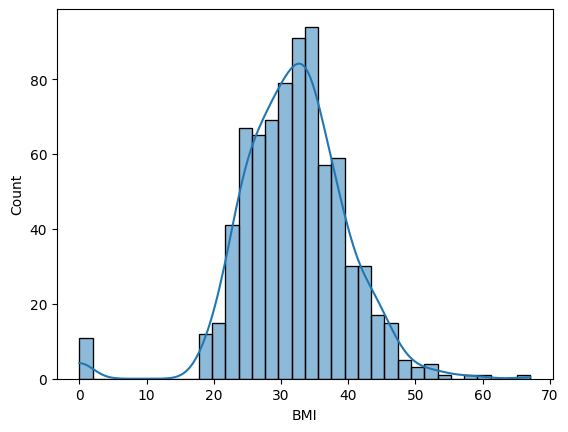

In [10]:
sns.histplot(data = df, x = 'BMI', kde = True)

<Axes: xlabel='BloodPressure', ylabel='Count'>

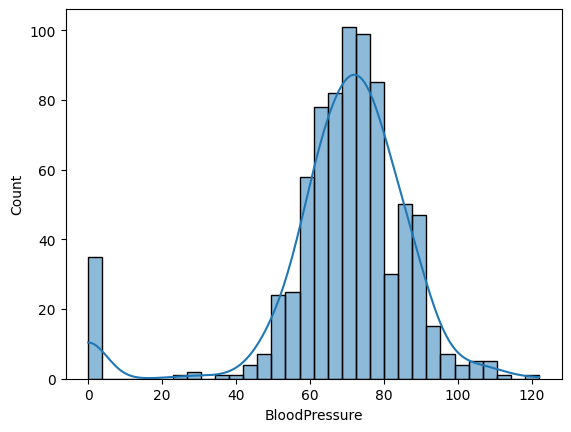

In [11]:
sns.histplot(data = df, x = 'BloodPressure', kde = True)

<Axes: xlabel='Class', ylabel='BMI'>

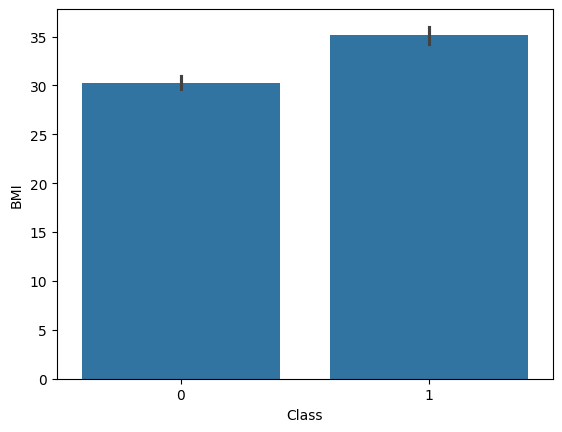

In [12]:
sns.barplot(data = df, x = 'Class', y = 'BMI')

<Axes: xlabel='Class', ylabel='BloodPressure'>

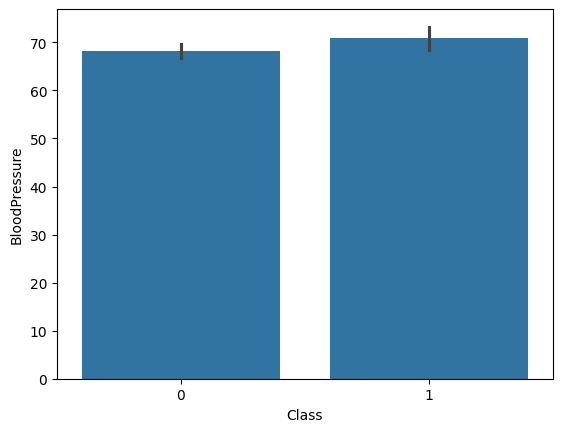

In [13]:
sns.barplot(data = df, x = 'Class', y = 'BloodPressure')

<Axes: xlabel='Class', ylabel='Pedigree'>

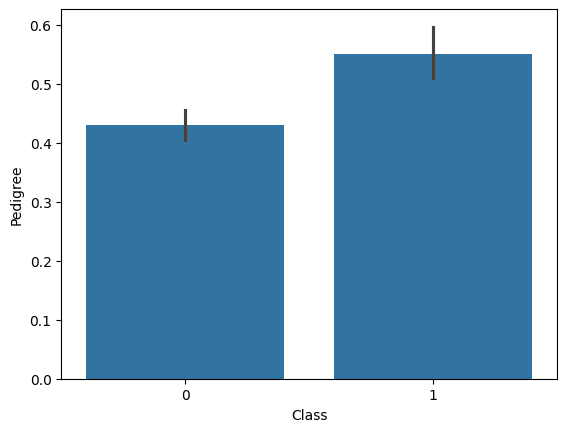

In [14]:
sns.barplot(data = df, x = 'Class', y = 'Pedigree')

<Axes: >

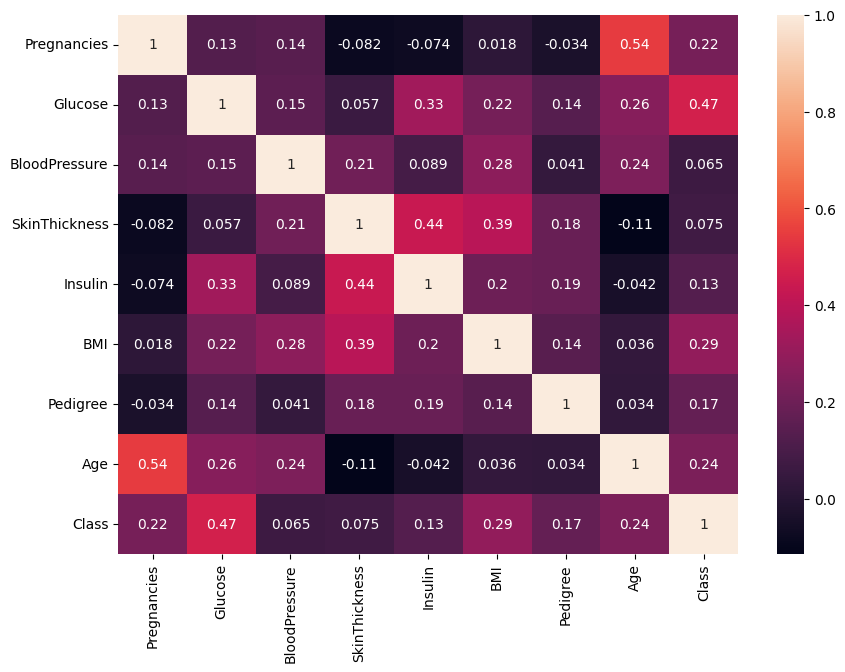

In [15]:
corr = df.corr()
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, fmt = '.2g')

In [16]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [17]:
# Replace 0s with NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [18]:
# Checking how many missing values we have now
df.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Class              0
dtype: int64

In [19]:
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())

In [20]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

In [21]:
# Features and Target
X = df.drop('Class', axis =1)
y = df['Class']

#### DATA SCALING

In [22]:
mms = MinMaxScaler()
cols = ['Pregnancies','Glucose','SkinThickness','Insulin','Pedigree','Age','BloodPressure']
for i in cols:
    df[i] = mms.fit_transform(df[[i]])

In [23]:
ss = StandardScaler()
df['BMI'] = ss.fit_transform(df[['BMI']])


In [24]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
106,0.058824,0.335484,1.0,0.23913,0.133413,-1.463491,0.055081,0.1,0


#### DATA SPLITTING

In [26]:
# Training Test Split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### Bagging with SVC

In [28]:
svc = SVC()
bm_svc = BaggingClassifier(estimator = SVC(), n_estimators=10) 

In [29]:
bm_svc.fit(X_train, y_train)

BaggingClassifier(estimator=SVC())

In [30]:
y_pred_svc = bm_svc.predict(X_test)

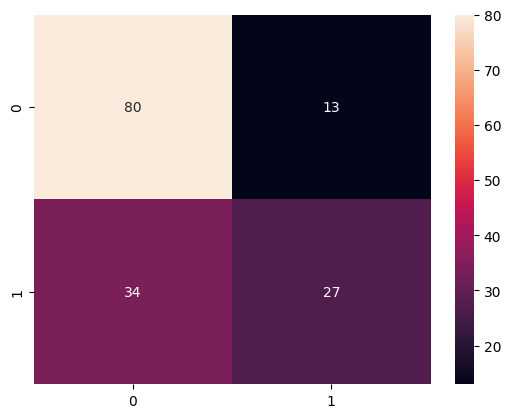

0.4426229508196721

In [31]:
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot = True, fmt = '')
plt.show()

recall_score(y_test, y_pred_svc)

In [32]:
def model_performance(model, predictors, target):
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame({
        'Accuracy': acc,
        'Recall': recall,
        'Precsion': precision,
        'F1 Score': f1}, index = [0])
    return df_perf

In [33]:
def confusion(model, predictors, target):
    pred = model.predict(predictors)
    cm = confusion_matrix(target, pred)

    plt.figure(figsize = (6,4))
    sns.heatmap(cm, annot = True, fmt = '')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')



In [34]:
print('Performance on Training Dataset')
model_performance(bm_svc, X_train, y_train)

Performance on Training Dataset


,Accuracy,Recall,Precsion,F1 Score
0,0.785016,0.507246,0.777778,0.614035


In [35]:
print('Performance on Testing Dataset')
model_performance(bm_svc, X_test, y_test)

Performance on Testing Dataset


,Accuracy,Recall,Precsion,F1 Score
0,0.694805,0.442623,0.675,0.534653


Performance on Training Dataset


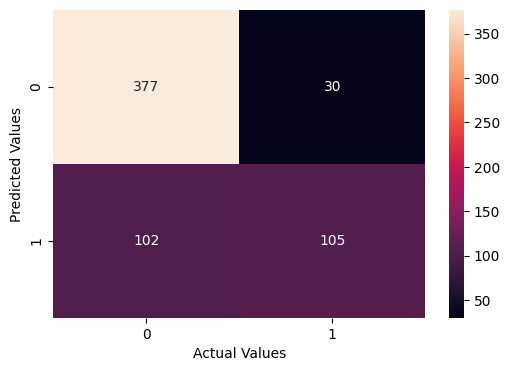

In [36]:
print('Performance on Training Dataset')
confusion(bm_svc, X_train, y_train)

Performance on Testing Dataset


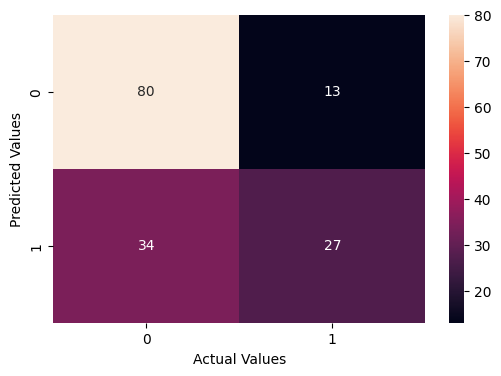

In [37]:
print('Performance on Testing Dataset')
confusion(bm_svc, X_test, y_test)

#### Bagging with Decision Tree

In [38]:
tree = DecisionTreeClassifier()
bagging_tree = BaggingClassifier(estimator = tree, n_estimators = 10)

In [39]:
bagging_tree.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [40]:
y_pred_tree = bagging_tree.predict(X_test)

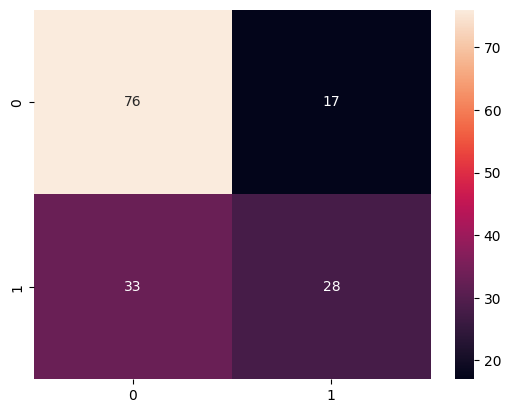

0.45901639344262296

In [41]:
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot = True, fmt = '')
plt.show()

recall_score(y_test, y_pred_tree)

In [42]:
print('Performance on Training Dataset')
model_performance(bagging_tree, X_train, y_train)

Performance on Training Dataset


,Accuracy,Recall,Precsion,F1 Score
0,0.986971,0.961353,1.0,0.980296


In [43]:
print('Performance on Testing Dataset')
model_performance(bagging_tree, X_test, y_test)

Performance on Testing Dataset


,Accuracy,Recall,Precsion,F1 Score
0,0.675325,0.459016,0.622222,0.528302


Performance on Training Dataset


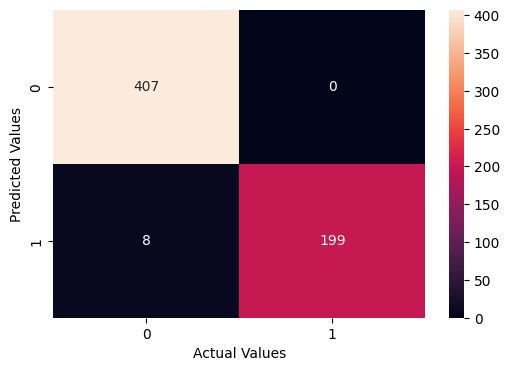

In [44]:
print('Performance on Training Dataset')
confusion(bagging_tree, X_train, y_train)

Performance on Testing Dataset


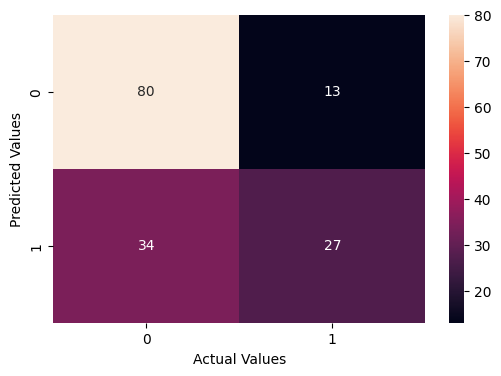

In [45]:
print('Performance on Testing Dataset')
confusion(bm_svc, X_test, y_test)

#### Random Forest

In [47]:
rf = RandomForestClassifier(n_estimators = 100)

In [48]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred_rf = rf.predict(X_test)

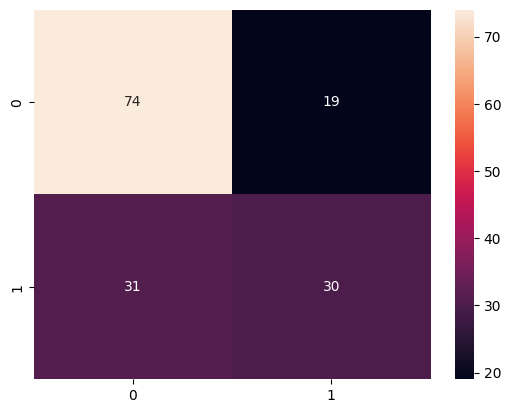

0.4918032786885246

In [50]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, fmt = '')
plt.show()

recall_score(y_test, y_pred_rf)

In [51]:
print('Performance on Training Dataset')
model_performance(rf, X_train, y_train)

Performance on Training Dataset


,Accuracy,Recall,Precsion,F1 Score
0,1.0,1.0,1.0,1.0


In [52]:
print('Performance on Testing Dataset')
model_performance(rf, X_test, y_test)

Performance on Testing Dataset


,Accuracy,Recall,Precsion,F1 Score
0,0.675325,0.491803,0.612245,0.545455


Performance on Training Dataset


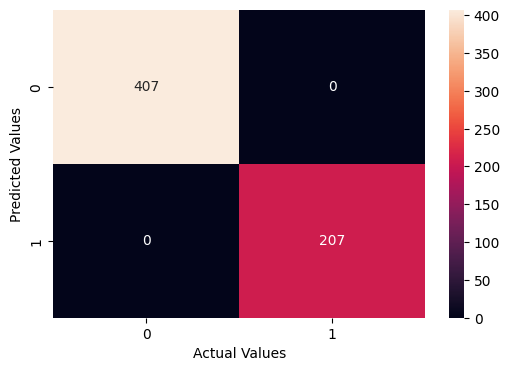

In [53]:
print('Performance on Training Dataset')
confusion(rf, X_train, y_train)

Performance on Testing Dataset


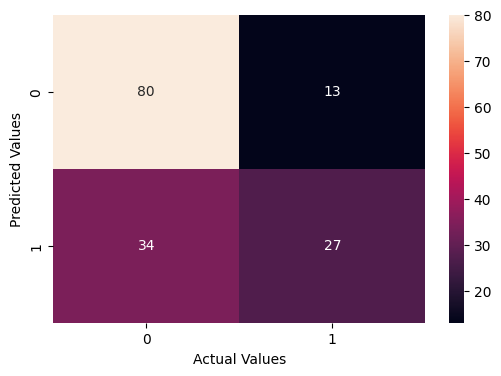

In [54]:
print('Performance on Testing Dataset')
confusion(bm_svc, X_test, y_test)